# Hotel Revenue Trend Analysis

This notebook analyzes revenue trends over time from the hotel bookings dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# Load the dataset
data_path = "data/hotel_bookings.csv"
df = pd.read_csv(data_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Preparation for Revenue Analysis

We need to calculate revenue based on the available data. Revenue can be calculated as:

Revenue = ADR (Average Daily Rate) × Number of Nights × Number of Guests

In [3]:
# Calculate total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Calculate revenue (ADR × total nights)
# Note: ADR already accounts for the number of guests
df['revenue'] = df['adr'] * df['total_nights']

# Filter out canceled bookings and zero revenue entries
df_revenue = df[(df['is_canceled'] == 0) & (df['revenue'] > 0)]

# Create date column for time series analysis
df_revenue['arrival_date'] = pd.to_datetime(df_revenue['reservation_status_date'])
df_revenue['arrival_month_year'] = pd.to_datetime(df_revenue['arrival_date_year'].astype(str) + '-' + 
                                              df_revenue['arrival_date_month'] + '-01')

# Display the prepared data
df_revenue[['hotel', 'arrival_date_month', 'arrival_date_year', 'adr', 'total_nights', 'revenue']].head()

/tmp/ipykernel_573215/3801010756.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['arrival_date'] = pd.to_datetime(df_revenue['reservation_status_date'])
/tmp/ipykernel_573215/3801010756.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['arrival_month_year'] = pd.to_datetime(df_revenue['arrival_date_year'].astype(str) + '-' +


,hotel,arrival_date_month,arrival_date_year,adr,total_nights,revenue
2,Resort Hotel,July,2015,75.0,1,75.0
3,Resort Hotel,July,2015,75.0,1,75.0
4,Resort Hotel,July,2015,98.0,2,196.0
5,Resort Hotel,July,2015,98.0,2,196.0
6,Resort Hotel,July,2015,107.0,2,214.0


## Monthly Revenue Trends

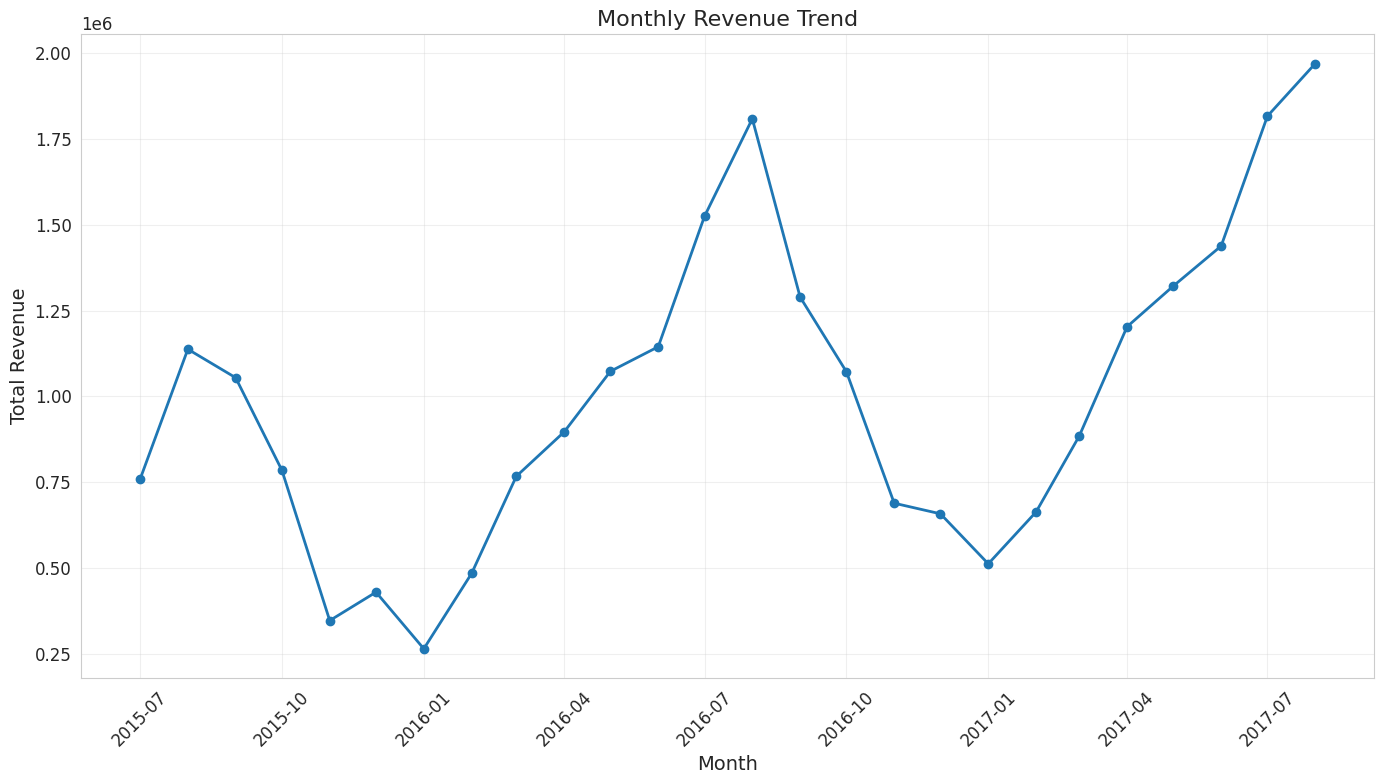

In [4]:
# Aggregate monthly revenue
monthly_revenue = df_revenue.groupby(['arrival_date_year', 'arrival_date_month'])['revenue'].sum().reset_index()

# Create a datetime column for proper ordering
monthly_revenue['date'] = pd.to_datetime(monthly_revenue['arrival_date_year'].astype(str) + '-' + 
                                        monthly_revenue['arrival_date_month'] + '-01')
monthly_revenue = monthly_revenue.sort_values('date')

# Plot monthly revenue trend
plt.figure(figsize=(14, 8))
plt.plot(monthly_revenue['date'], monthly_revenue['revenue'], marker='o', linestyle='-', linewidth=2)
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Revenue Comparison by Hotel Type

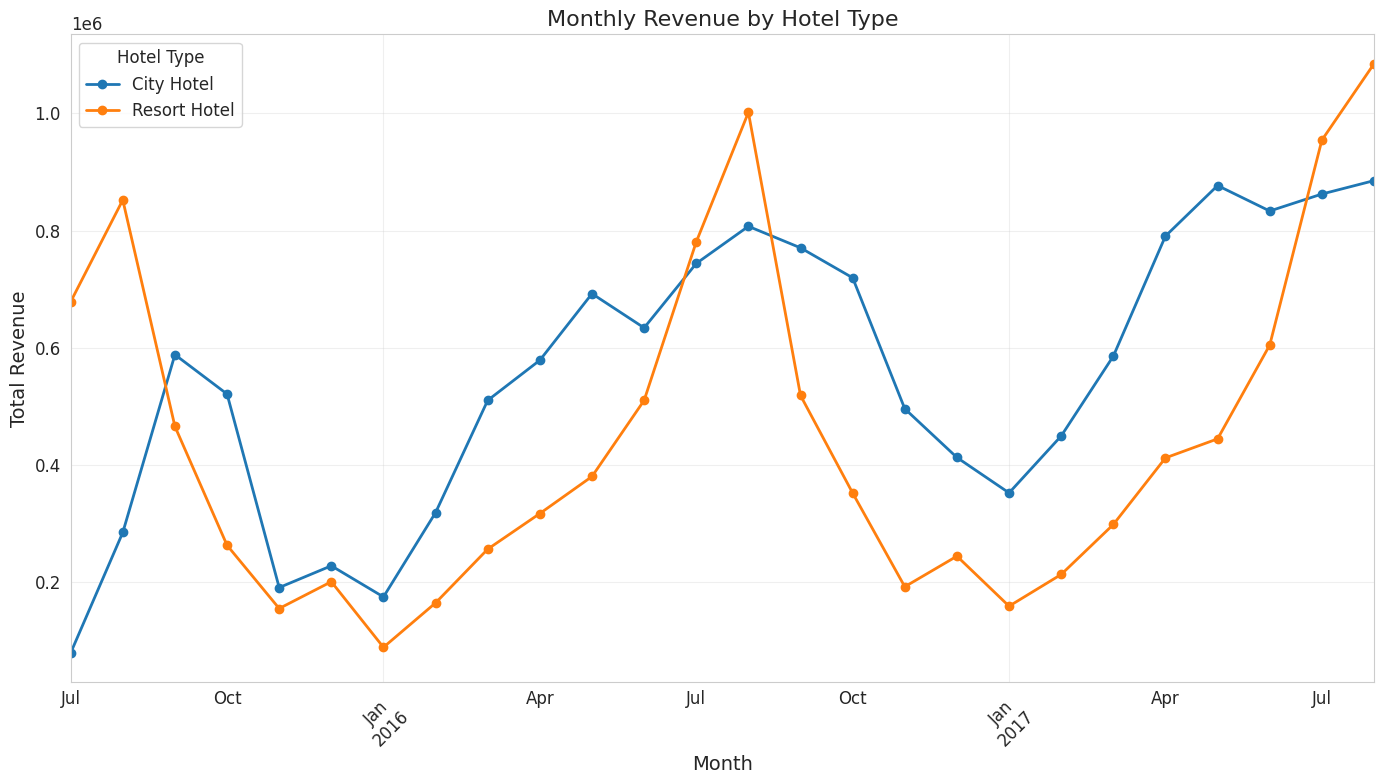

In [5]:
# Aggregate monthly revenue by hotel type
hotel_monthly_revenue = df_revenue.groupby(['arrival_date_year', 'arrival_date_month', 'hotel'])['revenue'].sum().reset_index()

# Create a datetime column for proper ordering
hotel_monthly_revenue['date'] = pd.to_datetime(hotel_monthly_revenue['arrival_date_year'].astype(str) + '-' + 
                                              hotel_monthly_revenue['arrival_date_month'] + '-01')
hotel_monthly_revenue = hotel_monthly_revenue.sort_values('date')

# Plot revenue comparison by hotel type
plt.figure(figsize=(14, 8))

# Create pivot table for easier plotting
hotel_pivot = hotel_monthly_revenue.pivot(index='date', columns='hotel', values='revenue')

# Plot
hotel_pivot.plot(marker='o', linestyle='-', linewidth=2, ax=plt.gca())

plt.title('Monthly Revenue by Hotel Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

## Seasonal Revenue Patterns

/tmp/ipykernel_573215/3771754933.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_date_month', y='revenue', data=seasonal_revenue,


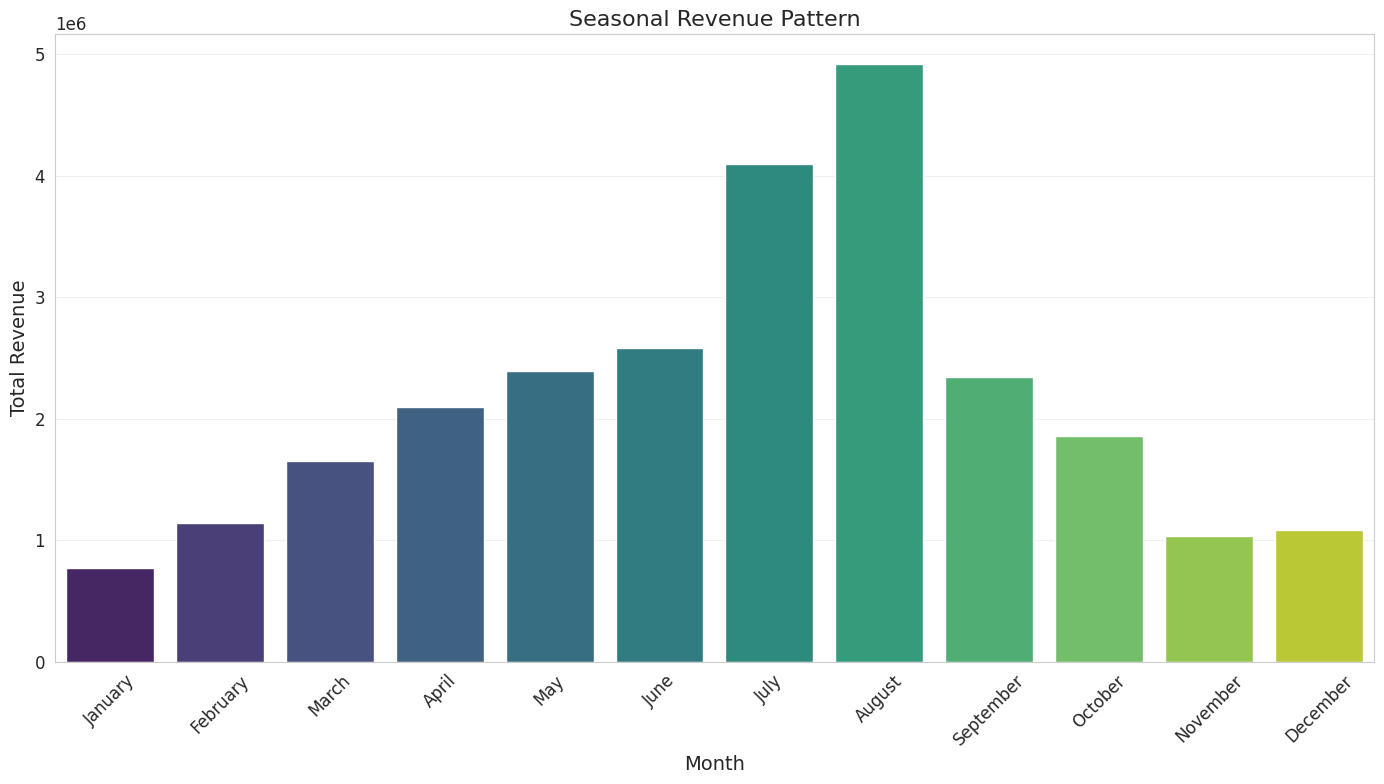

In [6]:
# Create a month order for proper seasonal display
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']

# Aggregate revenue by month (across all years)
seasonal_revenue = df_revenue.groupby('arrival_date_month')['revenue'].sum().reset_index()

# Ensure proper month ordering
seasonal_revenue['month_num'] = seasonal_revenue['arrival_date_month'].apply(lambda x: month_order.index(x))
seasonal_revenue = seasonal_revenue.sort_values('month_num')

# Plot seasonal revenue pattern
plt.figure(figsize=(14, 8))

# Bar plot
sns.barplot(x='arrival_date_month', y='revenue', data=seasonal_revenue, 
           order=month_order, palette='viridis')

plt.title('Seasonal Revenue Pattern', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## Average Daily Rate (ADR) Trends

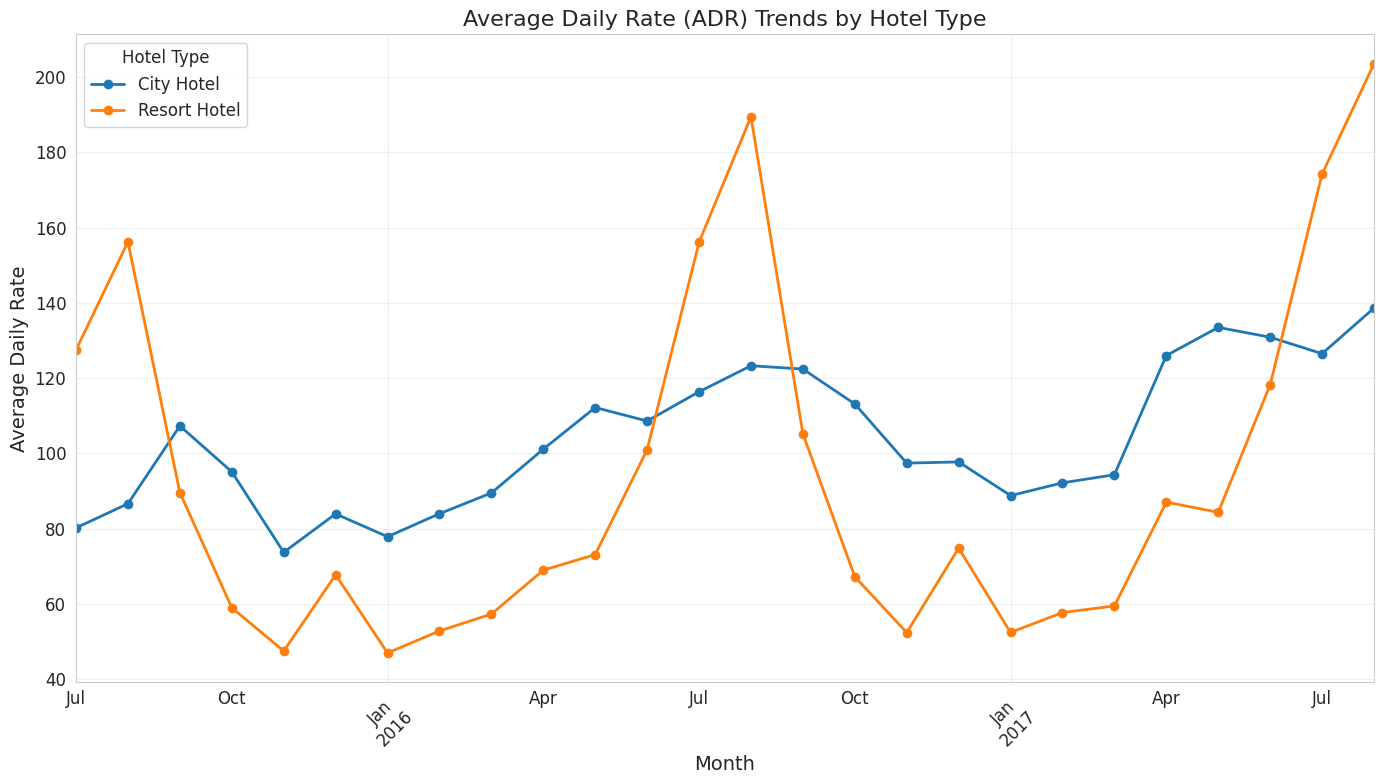

In [7]:
# Calculate average ADR by month and hotel type
adr_trends = df_revenue.groupby(['arrival_date_year', 'arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Create a datetime column for proper ordering
adr_trends['date'] = pd.to_datetime(adr_trends['arrival_date_year'].astype(str) + '-' + 
                                   adr_trends['arrival_date_month'] + '-01')
adr_trends = adr_trends.sort_values('date')

# Plot ADR trends by hotel type
plt.figure(figsize=(14, 8))

# Create pivot table for easier plotting
adr_pivot = adr_trends.pivot(index='date', columns='hotel', values='adr')

# Plot
adr_pivot.plot(marker='o', linestyle='-', linewidth=2, ax=plt.gca())

plt.title('Average Daily Rate (ADR) Trends by Hotel Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

## Revenue Distribution by Customer Type

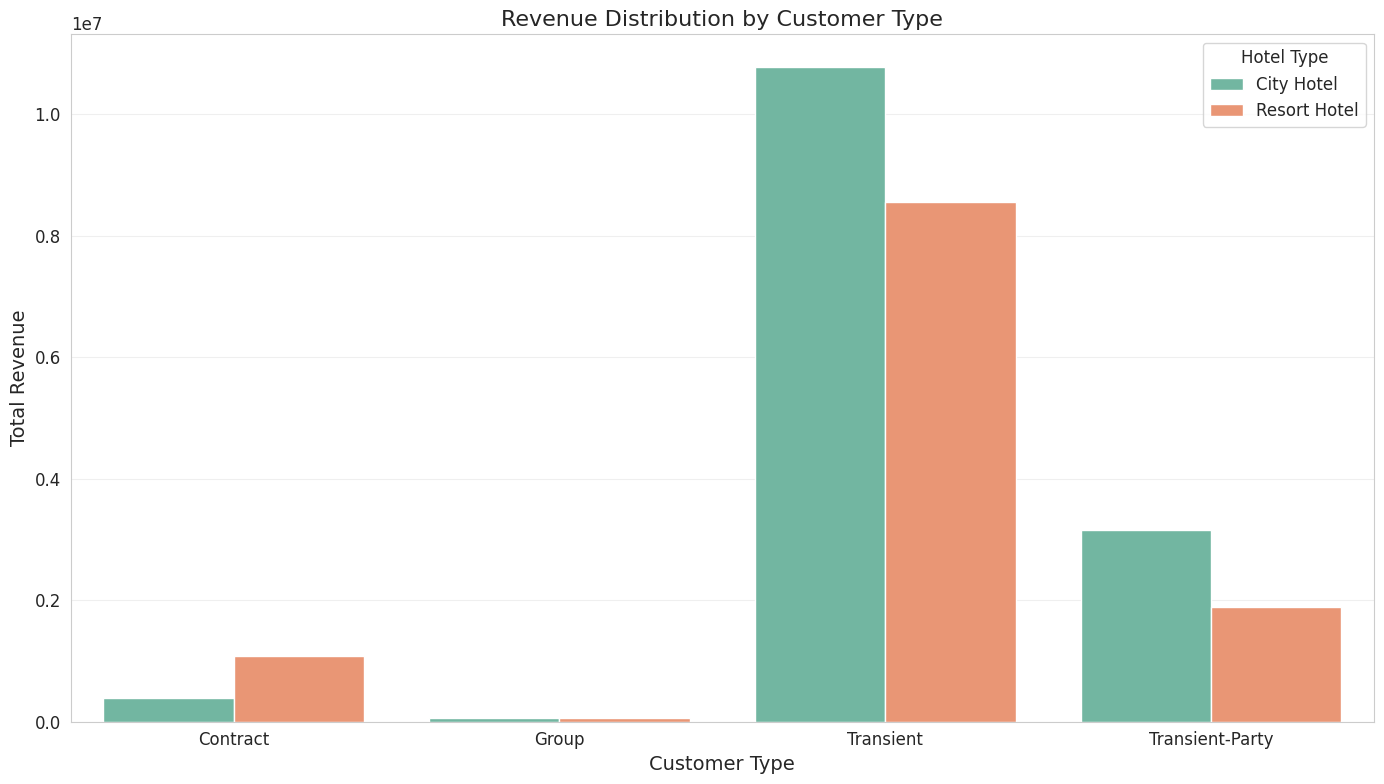

In [8]:
# Aggregate revenue by customer type and hotel
customer_revenue = df_revenue.groupby(['customer_type', 'hotel'])['revenue'].sum().reset_index()

# Plot revenue distribution by customer type
plt.figure(figsize=(14, 8))

# Bar plot
sns.barplot(x='customer_type', y='revenue', hue='hotel', data=customer_revenue, palette='Set2')

plt.title('Revenue Distribution by Customer Type', fontsize=16)
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

## Revenue by Market Segment

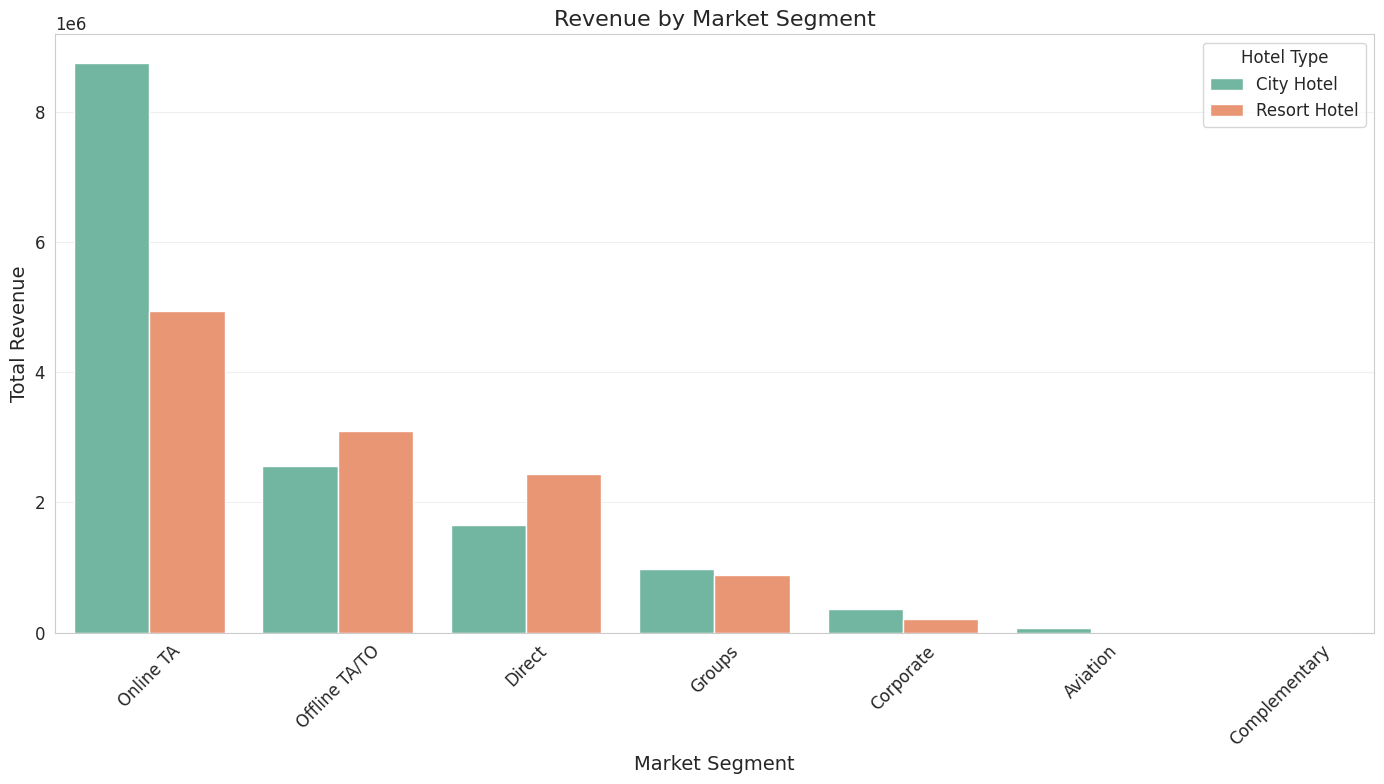

In [9]:
# Aggregate revenue by market segment and hotel
market_revenue = df_revenue.groupby(['market_segment', 'hotel'])['revenue'].sum().reset_index()

# Sort by revenue for better visualization
market_revenue = market_revenue.sort_values('revenue', ascending=False)

# Plot revenue by market segment
plt.figure(figsize=(14, 8))

# Bar plot
sns.barplot(x='market_segment', y='revenue', hue='hotel', data=market_revenue, palette='Set2')

plt.title('Revenue by Market Segment', fontsize=16)
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

## Summary of Revenue Analysis

Based on the visualizations above, we can observe several key insights about revenue trends:

1. **Seasonal Patterns**: Revenue shows clear seasonal patterns with peaks during specific months.
2. **Hotel Type Comparison**: The revenue patterns differ between Resort Hotels and City Hotels.
3. **Customer Segments**: Different customer types and market segments contribute differently to overall revenue.
4. **ADR Trends**: The Average Daily Rate fluctuates over time and differs by hotel type.

These insights can help in developing targeted marketing strategies and optimizing pricing based on seasonal demand.


--- Cancellation Rate Analysis ---

Total Bookings: 119,390
Cancelled Bookings: 44,224
Cancellation Rate: 37.04%


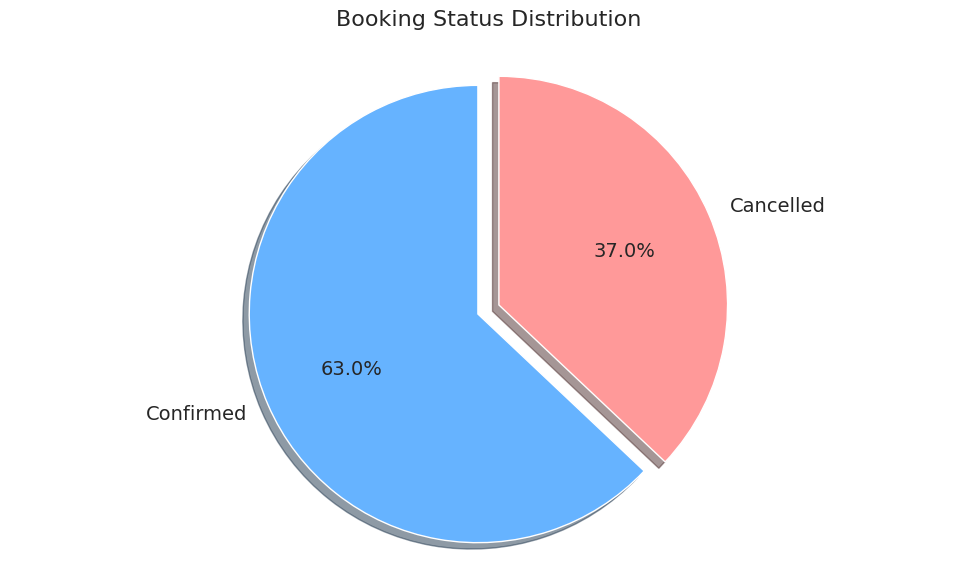

/tmp/ipykernel_718066/1810516336.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hotel_cancel.index, y=hotel_cancel.values, palette='viridis')


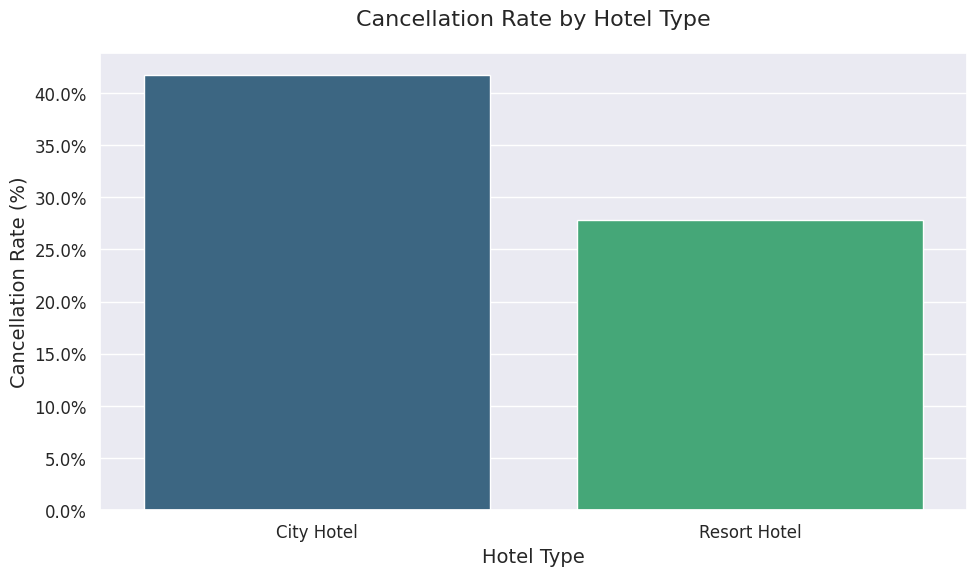

/tmp/ipykernel_718066/1810516336.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y=country_column, data=top_countries, palette='viridis')



--- Geographical Distribution Analysis ---

Top 10 country by number of bookings:
  country  count
0     PRT  48590
1     GBR  12129
2     FRA  10415
3     ESP   8568
4     DEU   7287
5     ITA   3766
6     IRL   3375
7     BEL   2342
8     BRA   2224
9     NLD   2104


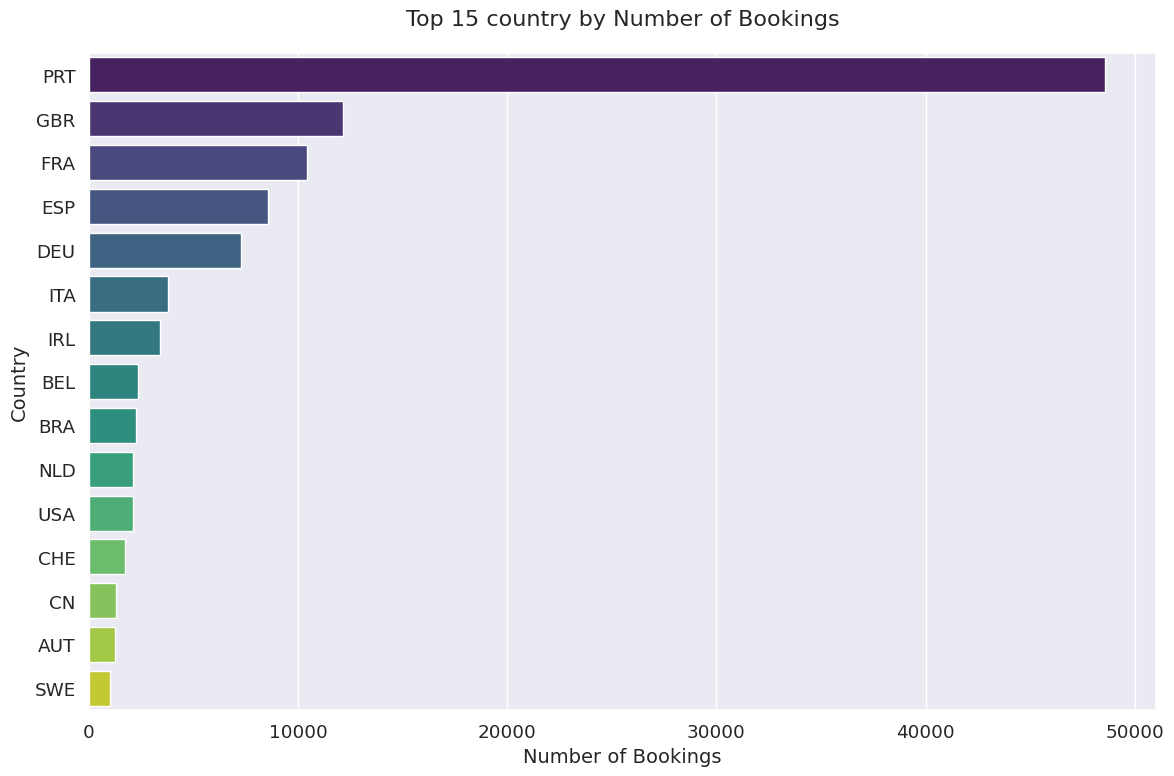

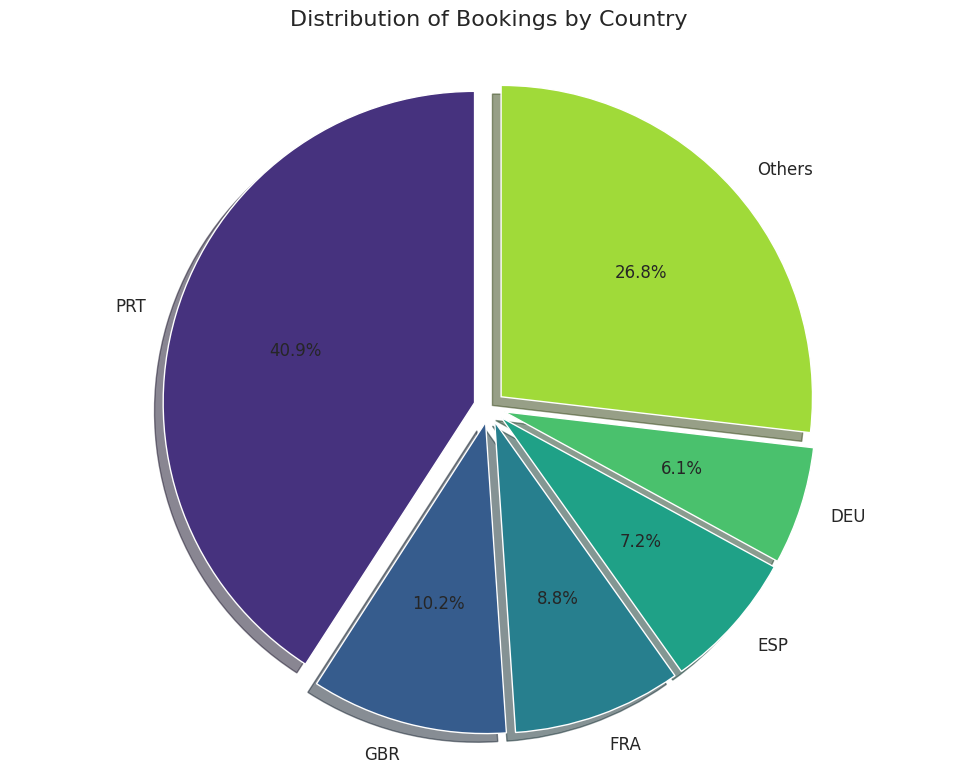


--- Lead Time Distribution Analysis ---

Lead Time Statistics (days):
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


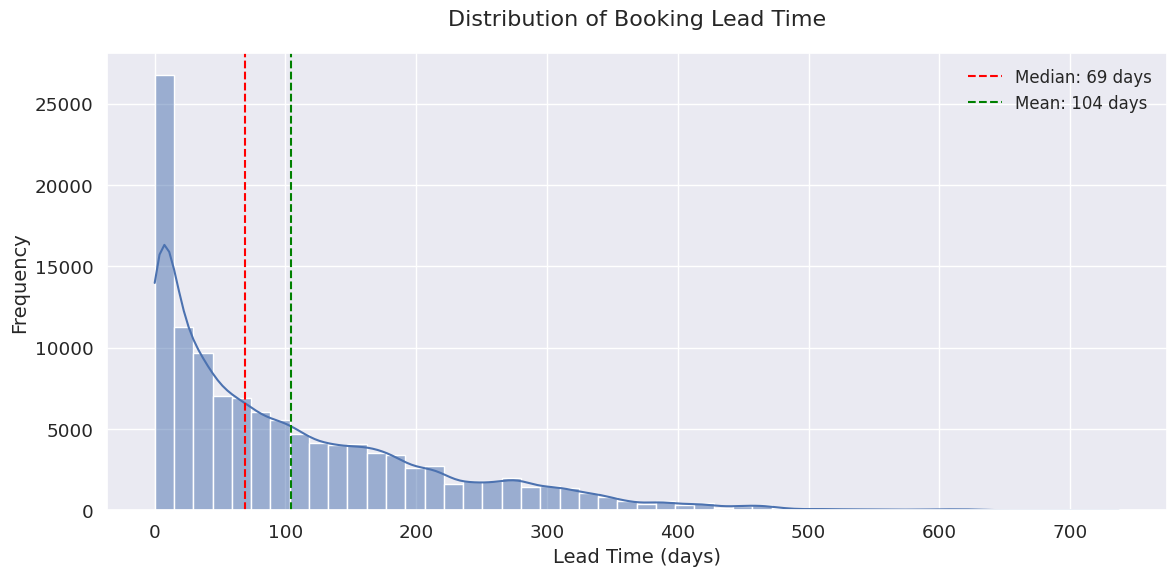

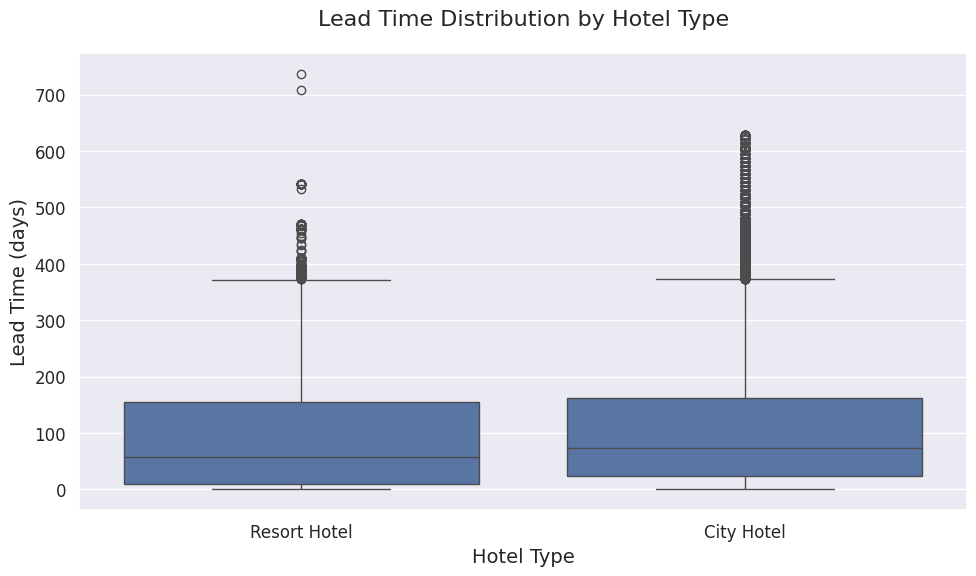

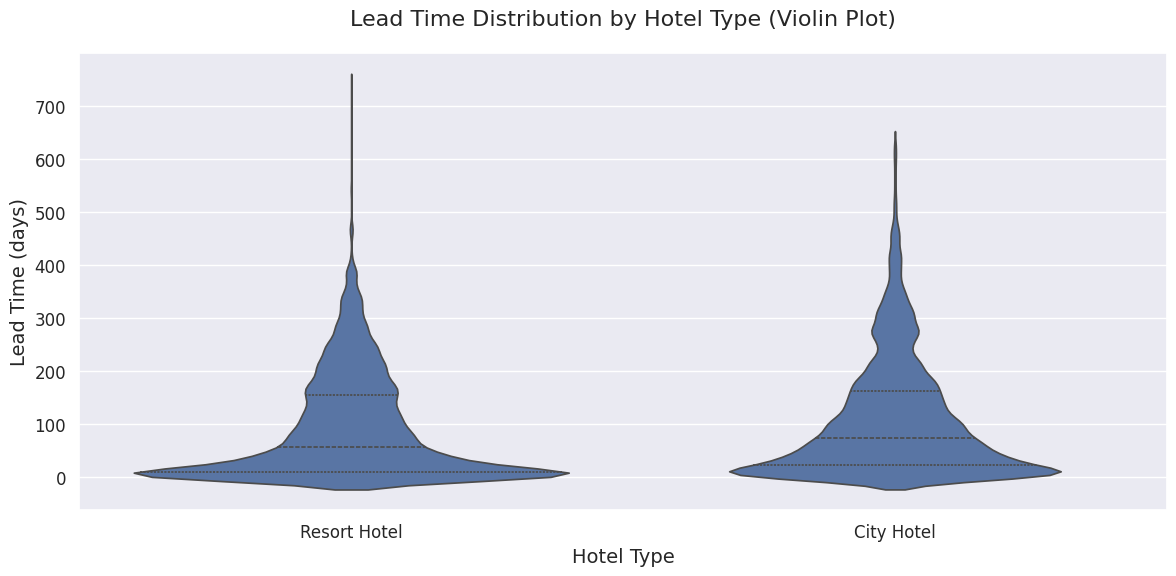

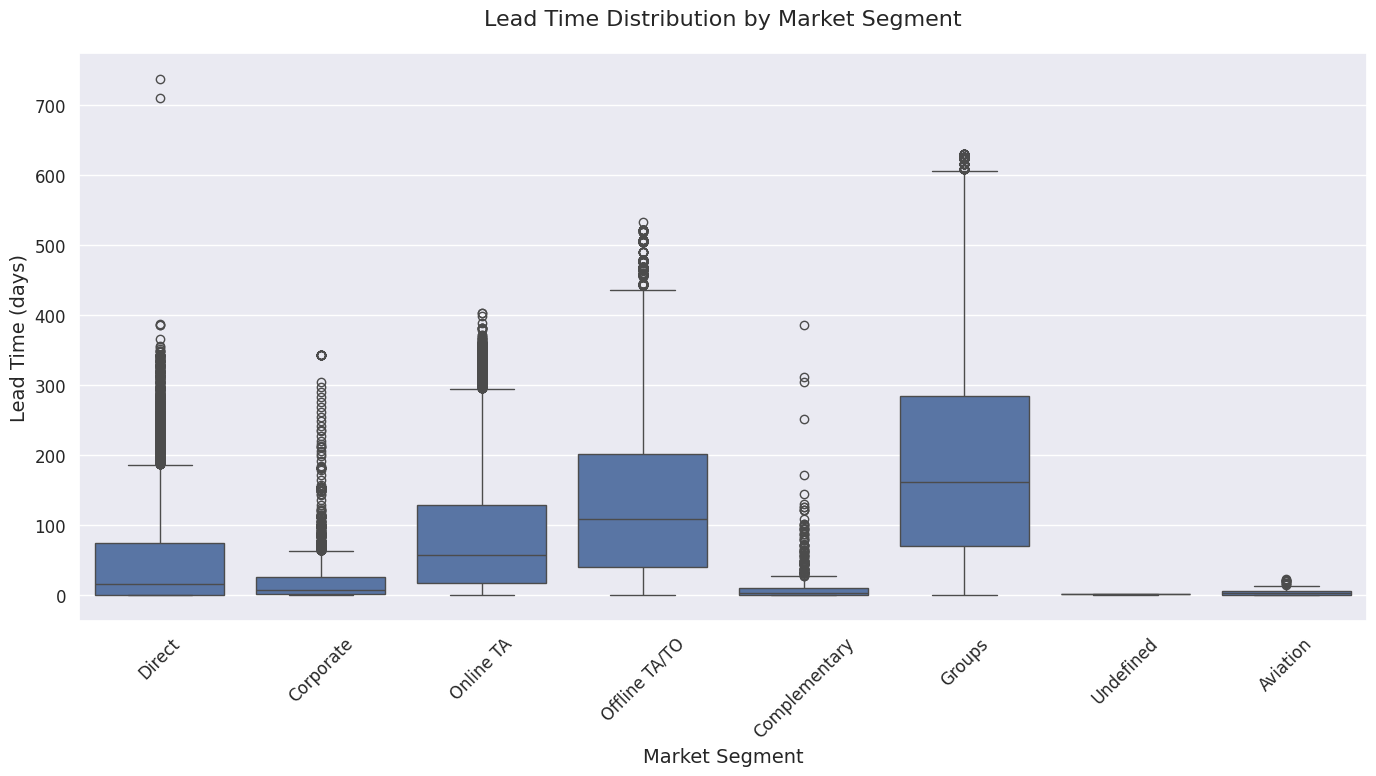


--- Summary of Findings ---

1. Cancellation Rate: 37.04% of all bookings were cancelled.
2. Geographical Distribution: The top source of bookings is from PRT.
3. Lead Time: The average booking lead time is 104 days, with a median of 69 days.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib.ticker import PercentFormatter

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

data_path = "data/hotel_bookings.csv"
df = pd.read_csv(data_path)
df.head(5)

# 1. Cancellation Rate as Percentage of Total Bookings
print("\n--- Cancellation Rate Analysis ---\n")

# Calculate cancellation rate
total_bookings = len(df)
cancelled_bookings = df['is_canceled'].sum()
cancellation_rate = (cancelled_bookings / total_bookings) * 100

print(f"Total Bookings: {total_bookings:,}")
print(f"Cancelled Bookings: {cancelled_bookings:,}")
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

# Create a pie chart to visualize cancellation rate
labels = ['Confirmed', 'Cancelled']
sizes = [(total_bookings - cancelled_bookings), cancelled_bookings]
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.1)  # explode the 2nd slice (Cancelled)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Booking Status Distribution', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Create a bar chart to visualize cancellation rate by hotel type
hotel_cancel = df.groupby('hotel')['is_canceled'].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=hotel_cancel.index, y=hotel_cancel.values, palette='viridis')
plt.title('Cancellation Rate by Hotel Type', fontsize=16, pad=20)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.tight_layout()
plt.show()

# 2. Geographical Distribution of Users
print("\n--- Geographical Distribution Analysis ---\n")

# Check if 'country' column exists in the dataset
if 'country' in df.columns:
    country_column = 'country'
else:
    # Use 'country_of_origin' or similar column if available
    potential_columns = ['country_of_origin', 'nationality', 'origin_country']
    for col in potential_columns:
        if col in df.columns:
            country_column = col
            break
    else:
        # If no direct country column, use market segment as a proxy
        country_column = 'market_segment'
        print("No direct country information found. Using market segment as a proxy for geographical distribution.")

# Count bookings by country/market segment
country_counts = df[country_column].value_counts().reset_index()
country_counts.columns = [country_column, 'count']
print(f"Top 10 {country_column} by number of bookings:")
print(country_counts.head(10))

# Create a bar chart for geographical distribution
plt.figure(figsize=(12, 8))
top_countries = country_counts.head(15)  # Show top 15 countries/segments
sns.barplot(x='count', y=country_column, data=top_countries, palette='viridis')
plt.title(f'Top 15 {country_column} by Number of Bookings', fontsize=16, pad=20)
plt.xlabel('Number of Bookings', fontsize=14)
plt.ylabel(country_column.replace('_', ' ').title(), fontsize=14)
plt.tight_layout()
plt.show()

# Create a pie chart for top 5 countries/segments
plt.figure(figsize=(10, 8))
top5 = country_counts.head(5)
others = pd.DataFrame({country_column: ['Others'], 
                      'count': [country_counts['count'][5:].sum()]})
pie_data = pd.concat([top5, others])

plt.pie(pie_data['count'], labels=pie_data[country_column], autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.05]*len(pie_data),
        textprops={'fontsize': 12}, colors=sns.color_palette('viridis', len(pie_data)))
plt.axis('equal')
plt.title(f'Distribution of Bookings by {country_column.replace("_", " ").title()}', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 3. Booking Lead Time Distribution
print("\n--- Lead Time Distribution Analysis ---\n")

# Basic statistics for lead time
lead_time_stats = df['lead_time'].describe()
print("Lead Time Statistics (days):")
print(lead_time_stats)

# Create a histogram for lead time distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Distribution of Booking Lead Time', fontsize=16, pad=20)
plt.xlabel('Lead Time (days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(df['lead_time'].median(), color='red', linestyle='--', label=f'Median: {df["lead_time"].median():.0f} days')
plt.axvline(df['lead_time'].mean(), color='green', linestyle='--', label=f'Mean: {df["lead_time"].mean():.0f} days')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Create a box plot for lead time by hotel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='lead_time', data=df)
plt.title('Lead Time Distribution by Hotel Type', fontsize=16, pad=20)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Lead Time (days)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Create a violin plot for a more detailed view
plt.figure(figsize=(12, 6))
sns.violinplot(x='hotel', y='lead_time', data=df, inner='quartile')
plt.title('Lead Time Distribution by Hotel Type (Violin Plot)', fontsize=16, pad=20)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Lead Time (days)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Additional analysis: Lead time by market segment
plt.figure(figsize=(14, 8))
sns.boxplot(x='market_segment', y='lead_time', data=df)
plt.title('Lead Time Distribution by Market Segment', fontsize=16, pad=20)
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Lead Time (days)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Summary of findings
print("\n--- Summary of Findings ---\n")
print(f"1. Cancellation Rate: {cancellation_rate:.2f}% of all bookings were cancelled.")
print(f"2. Geographical Distribution: The top source of bookings is from {country_counts.iloc[0][country_column]}.")
print(f"3. Lead Time: The average booking lead time is {df['lead_time'].mean():.0f} days, with a median of {df['lead_time'].median():.0f} days.")
